#### 1. Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_excel("C:/Users/harik/Data science Assignment/glass.xlsx", sheet_name="glass")

# Basic info
print(df.head())
print(df.info())
print(df.describe())


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
     

In [2]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#### 2. Data Visualization

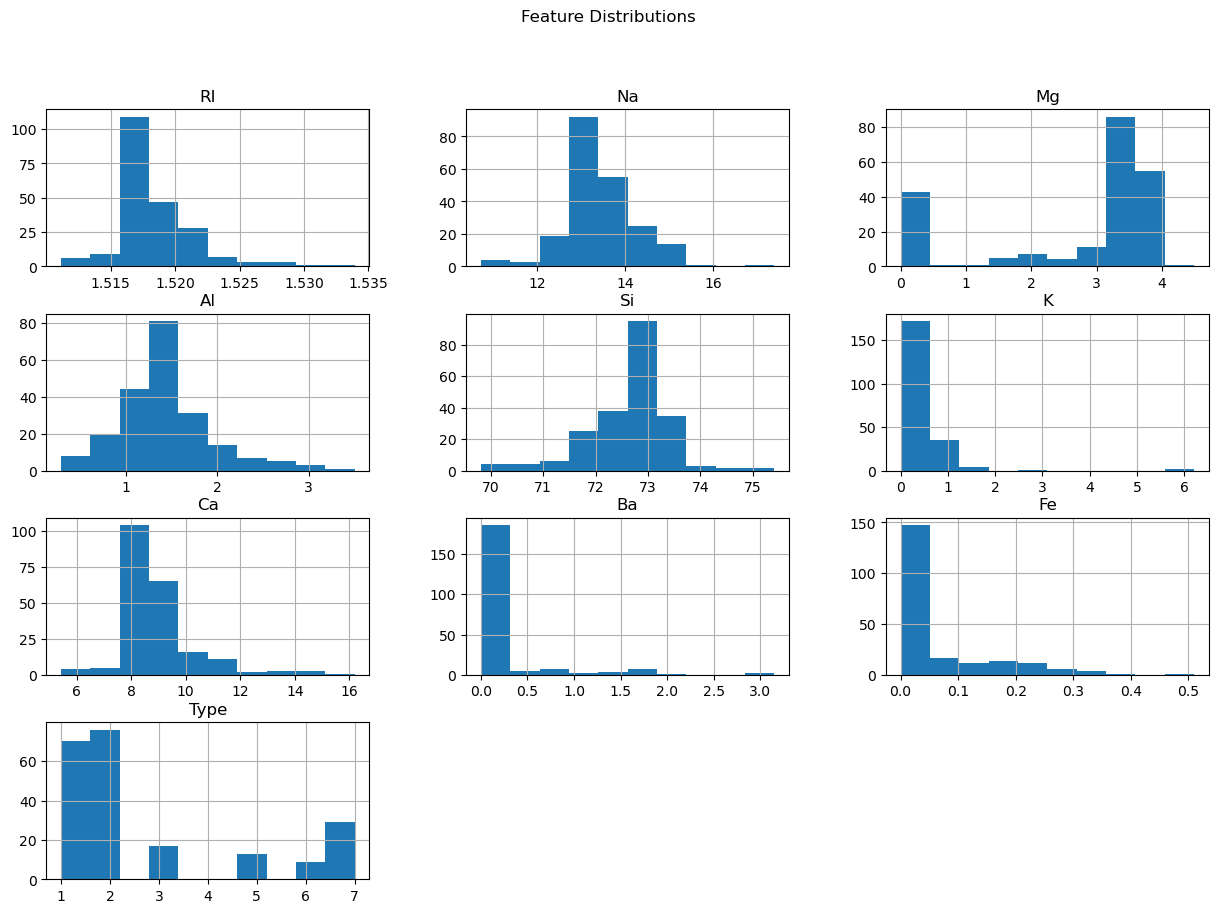

In [3]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()

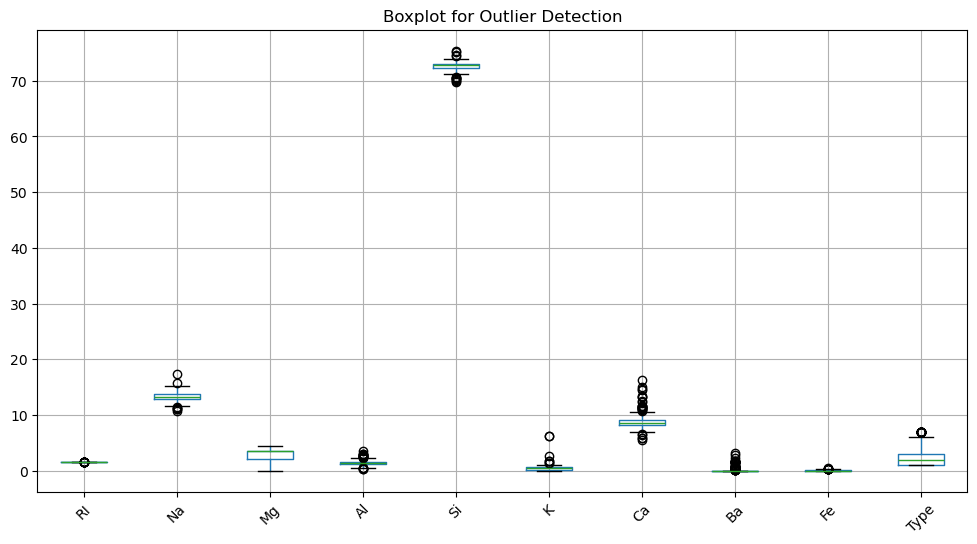

In [4]:
plt.figure(figsize=(12,6))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

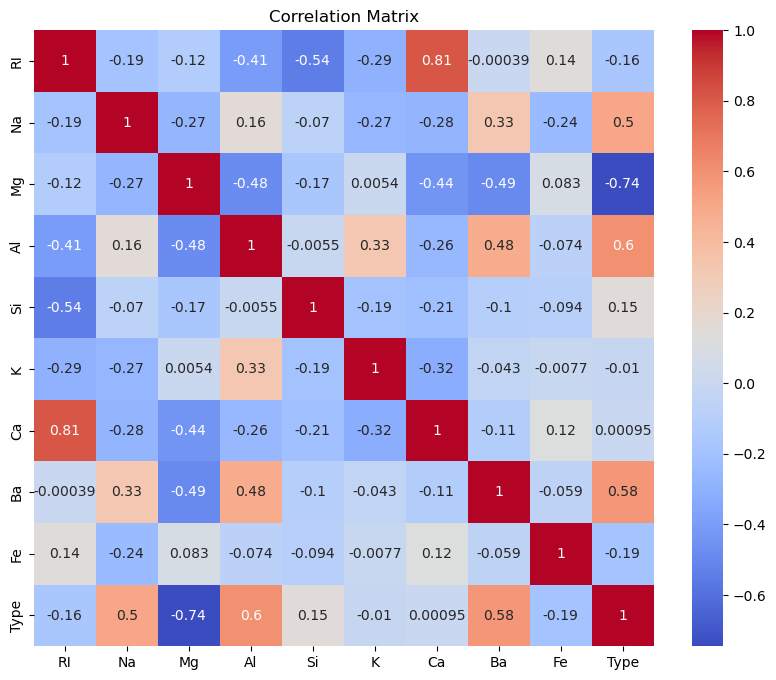

In [5]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### 3. Data Preprocessing

In [6]:
X = df.drop("Type", axis=1)
y = df["Type"]

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 4. Handling Imbalanced Data

In [8]:
y.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#### 5. Random Forest Model Implementation

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9130434782608695

Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.93      0.87      0.90        15
           3       0.93      0.87      0.90        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



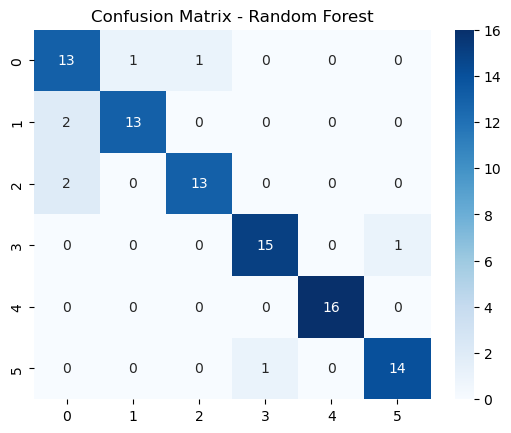

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

#### 6. Bagging and Boosting Methods

In [14]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=100,
    random_state=42
)

bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))

Bagging Accuracy: 0.8913043478260869


In [15]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)

print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))


C:\Users\harik\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting Accuracy: 0.6956521739130435


#### 7. Comparison Summary

In [16]:
results = pd.DataFrame({
    "Model": ["Random Forest", "Bagging", "Boosting"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_bag),
        accuracy_score(y_test, y_pred_boost)
    ]
})

results

,Model,Accuracy
0,Random Forest,0.913043
1,Bagging,0.891304
2,Boosting,0.695652
